In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<AxesSubplot:>

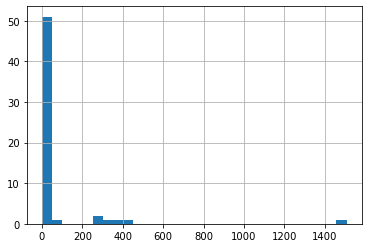

In [5]:
tags.groupby('userId').tag.count().hist(bins=30)

In [6]:
tags.groupby('userId').tag.count().median()

4.0

In [7]:
tags.groupby('userId').tag.count().mean()

63.5

<AxesSubplot:>

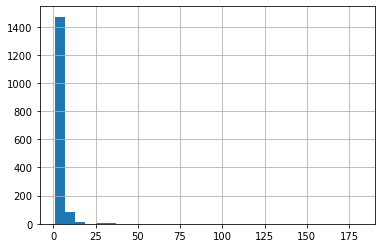

In [8]:
tags.groupby('movieId').tag.count().hist(bins=30)

In [9]:
tags.groupby('movieId').tag.count().mean()

2.3428753180661577

In [10]:
tags.groupby('movieId').tag.count().median()

1.0

In [11]:
tags['dt'] = tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)

<AxesSubplot:xlabel='year,month'>

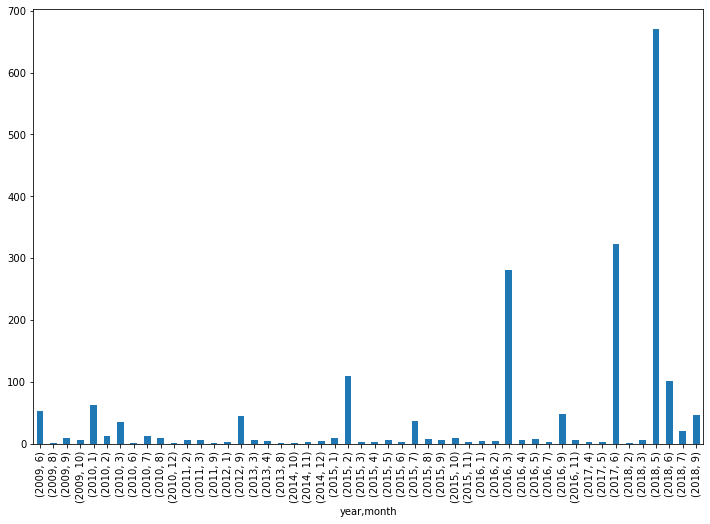

In [12]:
plt.figure(figsize=(12, 8))
tags.groupby(['year', 'month']).tag.count().sort_index()[-50:].plot.bar()

<AxesSubplot:>

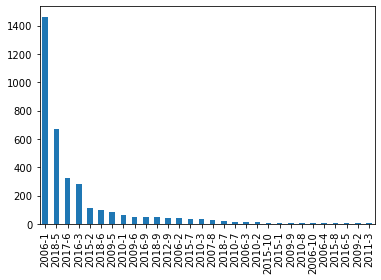

In [13]:
tags.year_month.value_counts()[:30].plot.bar()

<AxesSubplot:>

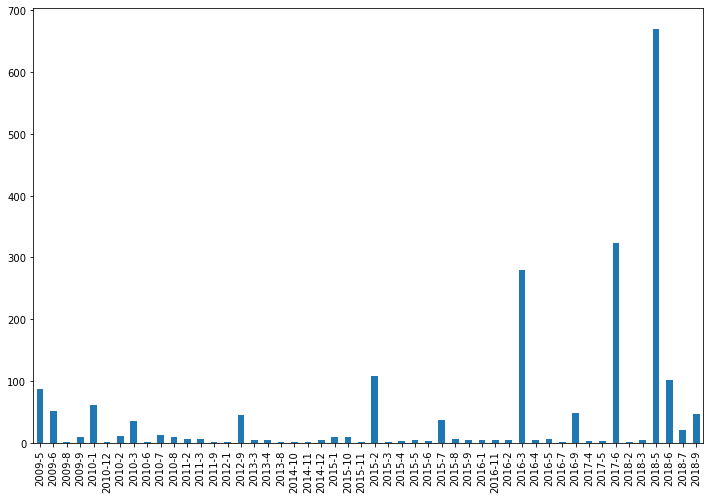

In [14]:
plt.figure(figsize=(12, 8))
tags.year_month.value_counts().sort_index()[-50:].plot.bar()

<AxesSubplot:>

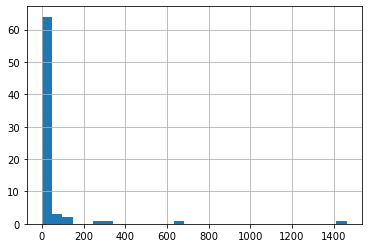

In [15]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [16]:
tags.groupby('year_month').tag.count().mean()

50.45205479452055

In [17]:
tags.groupby('year_month').tag.count().median()

5.0

In [18]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]

(array([2.851e+03, 3.218e+03, 2.338e+03, 9.870e+02, 2.710e+02, 6.300e+01,
        1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

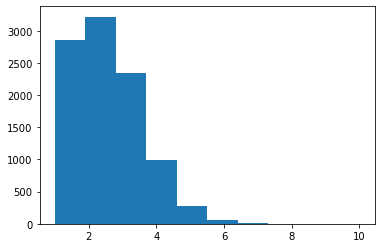

In [19]:
plt.hist(num_genres_on_movie)

In [20]:
np.mean(num_genres_on_movie)

2.2668856497639087

In [21]:
np.median(num_genres_on_movie)

2.0